## Test estadísticos

In [8]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Análisis gráfico
import matplotlib.pyplot as plt
import seaborn as sns

# Tests estadísticos
from scipy.stats import skew
from scipy import stats

# Opciones de visualización
pd.options.display.max_columns=None


In [2]:
# Cargamos nuestro dataframe con los datos tras el EDA inicial
df = pd.read_csv('../Datos/EDA_vinos.csv', sep=',', index_col=0)
df.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,982
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,16


`En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.`


¿Qué diferencia existe el error de tipo I y el error de tipo II?


> El error de tipo 1 se comete si rechazamos la hipótesis nula cuando es verdadera.
>
> El error de tipo 2 es cuando la hipótesis nula es falsa y no la rachazamos.

¿Qué es la asimetría?


> Es cuando la distribución de los datos de una variable carece de simetría con respecto a la media.
>
> La dstribución puede estar sesgada a la derecha (si tiene la mayor parte de los datos a la izquierda), o a la izquierda (si tiene la mayor parte de los datos a la derecha).

¿Es vuestra variable respuesta asimétrica?


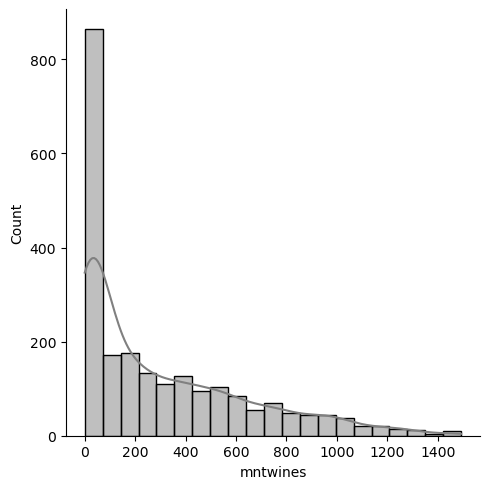

In [3]:
# Vamos a hacer una gráfica para comprobar su distribución de forma visual
sns.displot(df['mntwines'], kde = True, color = "grey")
plt.show();

In [9]:
# Vamos a calcularlo de forma numérica
skew(df['mntwines'])

1.1749830708938132

> El valor el positivo, nuestros datos están sesgados a la derecha.  
> Por lo tanto nuestra variable respuesta tiene una distribución asimétrica positiva y los datos no tienen una distribución normal.

In [4]:
# Vamos a comprobar si alguna otra de nuestras variables presenta una distribución más normal para que sea más apta para nuestra regresión lineal.
df_mnt= df[['mntwines', 'mntfruits','mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']]
df_mnt

,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


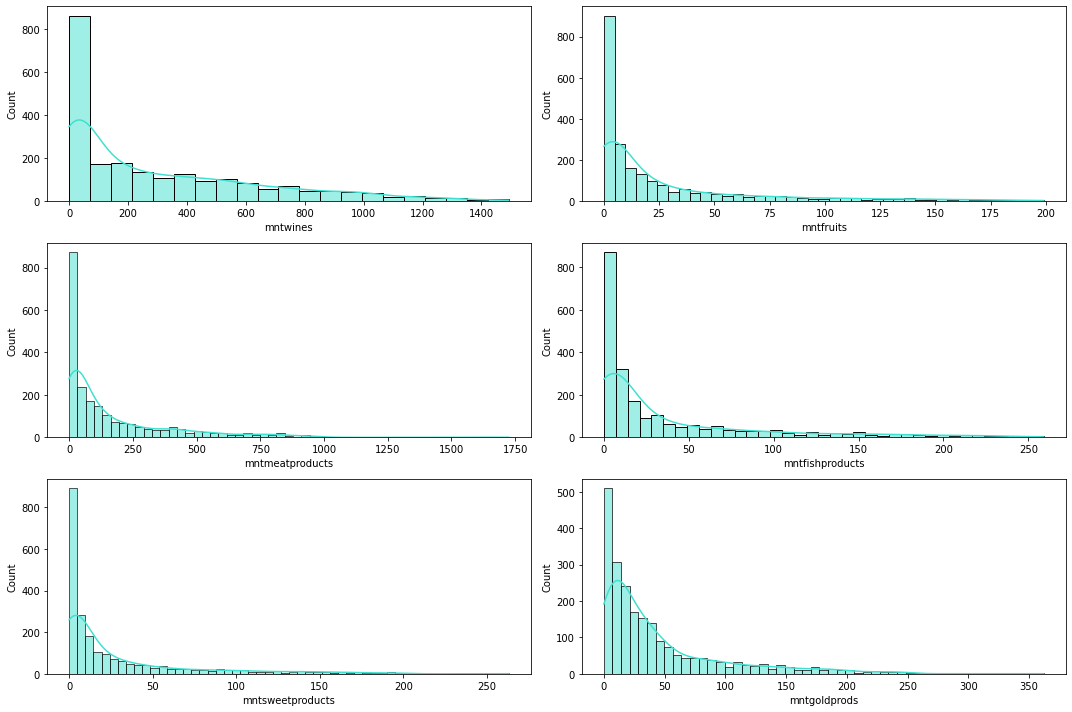

In [5]:
# Ploteamos las diferentes distribuciones
fig, axes = plt.subplots(nrows=3, ncols= 2, figsize=(15,10))

axes= axes.flat

columnas = df_mnt.columns

for i, col in enumerate(columnas):
    sns.histplot(data= df_mnt, x = col, ax= axes[i], kde=True, color= 'turquoise')
    
fig.tight_layout()
plt.show()

> Concluimos que todas tienen una distribución asimétrica, por lo que nos quedamos con nuestra variable: la cantidad de dinero gastada en vino.

¿Qué tipo de curtosis presenta vuestra variable respuesta?


In [6]:
# Vamos a calcular su curtosis con el test.
df_mnt.kurt()

mntwines            0.598744
mntfruits           4.050976
mntmeatproducts     5.516724
mntfishproducts     3.096461
mntsweetproducts    4.376548
mntgoldprods        3.551709
dtype: float64

> Nuestra variable no sigue una distribución normal, por lo que no podemos determinar la curtosis de nuestra variable.
>
> Sin embargo, según el test serían todas leptocúrticas. 
>
>Leptocurtosis es cuando la curtosis es > 0, y la concentración de la distribución en unos pocos valores es más alta que en otros. 


¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.


In [10]:
# Ya sabemos que no tiene uns distribución normal, pero vamos a hacer el test de shapiro, ya que tenemos menos de 5000 registros

stats.shapiro(df['mntwines'])

ShapiroResult(statistic=0.8381438255310059, pvalue=5.7032847498020055e-43)

H0: datos son normales  
H1: datos no son normales

| Test Shapiro  |  Resultado | Conclusión |
|---|---|---|
|  p-value > 0.05  | No significativo   | Datos  Normales|
|p-value < 0.05 (rechazamos H0)| Significativo| Datos No Normales |

> Nuestro p_valor es < 0, por lo tanto no son normales